In [589]:
# read text files in logs directory and print out the results
import os
import pandas as pd
import matplotlib.pyplot as plt

LOG_DIRECTORY = './logs/'
START_TIME = 0

In [590]:
# Get the latest log file
def get_latest_log_file(startwith: str=None):
    # get the list of files in the directory
    files = os.listdir(LOG_DIRECTORY)    
    # sort the files
    files.sort()
    # get the latest file that starts with 'c5'
    latest_file = ''
    if startwith is not None:
        for file in files:
            if file.startswith(startwith):
                latest_file = file
    else:
        latest_file = files[-1]
    # return the latest file
    print('Reading log file: ' + latest_file)
    return LOG_DIRECTORY + latest_file

def read_log_file(file_name: str):
    with open(file_name, 'r') as f:
        lines = f.readlines()
    return lines
        
with open(get_latest_log_file('c5'), 'r') as f:
    lines = f.readlines()
display(lines)

Reading log file: c5_2024-01-25_21-27-38.yaml


['\x1b[ INFO] [1706236059.597437137]: using default namespace\x1b\n',
 '\x1b[ INFO] [1706236059.628974291]: Waiting for FCU connection\x1b\n',
 '\x1b[ INFO] [1706236059.815520455, 12847.801000000]: Connected to FCU\x1b\n',
 '\x1b[ INFO] [1706236059.815611914, 12847.801000000]: Waiting for user to set mode to GUIDED\x1b\n',
 '\x1b[ INFO] [1706236059.815630922, 12847.801000000]: Mode set to GUIDED. Mission starting\x1b\n',
 '\x1b-------------------------------------------------\x1b\n',
 'Current Time:    12848.301000000\n',
 'Drone State:     -0.898757, -4.61729, 1.028, 89.0093, 0.01, nan\n',
 'Drone Orien:     0.000208826, -0.000774904, 89.0093\n',
 'Marker State:    0.0194712, -4.61503, 0.1, -179.758, 0.2237\n',
 'Distance to cp:  0.932079\n',
 'Intersect State: 0.0201212, -4.46098, 1, -80.3457, 2\n',
 'Destination xyz: -4.46098, -0.020121, 1\n',
 'Mode: Targeting\n',
 '\x1b-------------------------------------------------\x1b\n',
 'Current Time:    12848.551000000\n',
 'Drone State:  

In [591]:
# parse the log file
# log file has multiple segments, each segment starts with a line with the following format "Current Time: "

# divide the log file into segments
# parse each segment

# remove red lines from the log file
lines = [line.strip() for line in lines if not line.startswith('\x1b') and len(line.strip()) > 0]
lines

['Current Time:    12848.301000000',
 'Drone State:     -0.898757, -4.61729, 1.028, 89.0093, 0.01, nan',
 'Drone Orien:     0.000208826, -0.000774904, 89.0093',
 'Marker State:    0.0194712, -4.61503, 0.1, -179.758, 0.2237',
 'Distance to cp:  0.932079',
 'Intersect State: 0.0201212, -4.46098, 1, -80.3457, 2',
 'Destination xyz: -4.46098, -0.020121, 1',
 'Mode: Targeting',
 'Current Time:    12848.551000000',
 'Drone State:     -0.898757, -4.61729, 1.028, 89.0088, 0.01, nan',
 'Drone Orien:     0.000328033, -0.000950255, 89.0088',
 'Marker State:    -0.199361, -4.61125, 0.114934, -44.8791, 0.442475',
 'Distance to cp:  0.877593',
 'Intersect State: -0.035583, -4.77572, 1, -100.401, 2',
 'Destination xyz: -4.77572, 0.0355832, 1',
 'Mode: Targeting',
 'Current Time:    12848.801000000',
 'Drone State:     -0.898757, -4.61729, 1.028, 89.0108, 0, -inf',
 'Drone Orien:     0.000453536, -0.001113, 89.0108',
 'Marker State:    -0.33138, -4.60821, 0.116707, 0.0805783, 0.457526',
 'Distance to 

In [592]:
pairs = [((s:=line.split(':'))[0].strip(), s[1].strip()) for line in lines]
pairs

[('Current Time', '12848.301000000'),
 ('Drone State', '-0.898757, -4.61729, 1.028, 89.0093, 0.01, nan'),
 ('Drone Orien', '0.000208826, -0.000774904, 89.0093'),
 ('Marker State', '0.0194712, -4.61503, 0.1, -179.758, 0.2237'),
 ('Distance to cp', '0.932079'),
 ('Intersect State', '0.0201212, -4.46098, 1, -80.3457, 2'),
 ('Destination xyz', '-4.46098, -0.020121, 1'),
 ('Mode', 'Targeting'),
 ('Current Time', '12848.551000000'),
 ('Drone State', '-0.898757, -4.61729, 1.028, 89.0088, 0.01, nan'),
 ('Drone Orien', '0.000328033, -0.000950255, 89.0088'),
 ('Marker State', '-0.199361, -4.61125, 0.114934, -44.8791, 0.442475'),
 ('Distance to cp', '0.877593'),
 ('Intersect State', '-0.035583, -4.77572, 1, -100.401, 2'),
 ('Destination xyz', '-4.77572, 0.0355832, 1'),
 ('Mode', 'Targeting'),
 ('Current Time', '12848.801000000'),
 ('Drone State', '-0.898757, -4.61729, 1.028, 89.0108, 0, -inf'),
 ('Drone Orien', '0.000453536, -0.001113, 89.0108'),
 ('Marker State', '-0.33138, -4.60821, 0.116707, 0

In [593]:
# Convert list of tuples to dictionary

frames = [] # list of dictionaries

for k,v in pairs:
    k = k.strip().replace(' ', '_').lower()
    if k == 'current_time': 
        frames.append({
            k:float(v)
        })
    else:
        comps = v.split(',')
        if len(comps) == 1:
            frames[-1][k] = v.strip()
        else:
            for i, comp in enumerate(comps,1):
                comp = comp.strip()
                if comp.strip() == 'nan': 
                    continue
                k_comp = k + '_' + str(i)
                try: frames[-1][k_comp] = float(comp)
                except: frames[-1][k_comp] = comp
        
frames

[{'current_time': 12848.301,
  'drone_state_1': -0.898757,
  'drone_state_2': -4.61729,
  'drone_state_3': 1.028,
  'drone_state_4': 89.0093,
  'drone_state_5': 0.01,
  'drone_orien_1': 0.000208826,
  'drone_orien_2': -0.000774904,
  'drone_orien_3': 89.0093,
  'marker_state_1': 0.0194712,
  'marker_state_2': -4.61503,
  'marker_state_3': 0.1,
  'marker_state_4': -179.758,
  'marker_state_5': 0.2237,
  'distance_to_cp': '0.932079',
  'intersect_state_1': 0.0201212,
  'intersect_state_2': -4.46098,
  'intersect_state_3': 1.0,
  'intersect_state_4': -80.3457,
  'intersect_state_5': 2.0,
  'destination_xyz_1': -4.46098,
  'destination_xyz_2': -0.020121,
  'destination_xyz_3': 1.0,
  'mode': 'Targeting'},
 {'current_time': 12848.551,
  'drone_state_1': -0.898757,
  'drone_state_2': -4.61729,
  'drone_state_3': 1.028,
  'drone_state_4': 89.0088,
  'drone_state_5': 0.01,
  'drone_orien_1': 0.000328033,
  'drone_orien_2': -0.000950255,
  'drone_orien_3': 89.0088,
  'marker_state_1': -0.199361

In [594]:
data = pd.DataFrame(frames)
data.rename(columns={
    'current_time':'time',
    
    # Drone State
    'drone_state_1': 'drone_x',
    'drone_state_2': 'drone_y',
    'drone_state_3': 'drone_z',
    'drone_state_4': 'drone_hdg',
    'drone_state_5': 'drone_spd',
    'drone_state_6': 'drone_acc',
    'drone_orien_1': 'drone_roll',
    'drone_orien_1': 'drone_roll',
    'drone_orien_2': 'drone_pitch',
    'drone_orien_3': 'drone_yaw',
    
    # Marker State
    'marker_state_1': 'marker_x',
    'marker_state_2': 'marker_y',
    'marker_state_3': 'marker_z',
    'marker_state_4': 'marker_hdg',
    'marker_state_5': 'marker_spd',
    
    # intersection State
    'intersect_state_1': 'intersect_x',
    'intersect_state_2': 'intersect_y',
    'intersect_state_3': 'intersect_z',
    'intersect_state_4': 'intersect_hdg',
    'intersect_state_5': 'intersect_spd',
    
    # Search State
    'search_state_1': 'search_x',
    'search_state_2': 'search_y',
    'search_state_3': 'search_z',
    'search_state_4': 'search_hdg',
    'search_state_5': 'search_spd',
}, inplace=True)
data.set_index('time', inplace=True)
data

,drone_x,drone_y,drone_z,drone_hdg,drone_spd,drone_roll,drone_pitch,drone_yaw,marker_x,marker_y,...,intersect_x,intersect_y,intersect_z,intersect_hdg,intersect_spd,destination_xyz_1,destination_xyz_2,destination_xyz_3,mode,drone_acc
time,,,,,,,,,,,,,,,,,,,,,
12848.301,-0.898757,-4.61729,1.028,89.0093,0.010000,0.000209,-0.000775,89.0093,0.019471,-4.61503,...,0.020121,-4.46098,1.0,-80.3457,2.0,-4.46098,-0.020121,1.0,Targeting,NaN
12848.551,-0.898757,-4.61729,1.028,89.0088,0.010000,0.000328,-0.000950,89.0088,-0.199361,-4.61125,...,-0.035583,-4.77572,1.0,-100.4010,2.0,-4.77572,0.035583,1.0,Targeting,NaN
12848.801,-0.898757,-4.61729,1.028,89.0108,0.000000,0.000454,-0.001113,89.0108,-0.331380,-4.60821,...,-0.331654,-4.80293,1.0,-108.1260,2.0,-4.80293,0.331654,1.0,Targeting,-inf
12849.051,-0.898757,-4.61729,1.029,82.7693,0.050990,0.009914,-0.039941,82.7693,-0.513915,-4.55765,...,-0.569241,-4.69082,1.0,-102.5790,2.0,-4.69082,0.569241,1.0,Targeting,0.040990
12849.301,-0.876565,-4.61729,1.029,68.9199,0.150000,0.003292,-0.041049,68.9199,-0.651746,-4.61164,...,-0.747498,-4.61164,1.0,-87.4962,2.0,-4.61164,0.747499,1.0,Targeting,0.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12888.551,4.149820,-4.71727,1.030,-88.3277,0.590339,-0.007985,0.001971,-88.3277,5.297370,-4.61057,...,5.746650,-4.61057,1.0,-86.1773,2.0,-4.61057,-5.746650,1.0,Targeting,-0.011741
12888.801,4.305160,-4.71727,1.030,-86.9625,0.600000,-0.005626,0.001996,-86.9625,5.434980,-4.60716,...,5.864860,-4.60716,1.0,-85.9619,2.0,-4.60716,-5.864860,1.0,Targeting,0.003175
12889.051,4.460500,-4.70818,1.030,-86.1767,0.600083,-0.003340,-0.000334,-86.1767,5.568490,-4.60555,...,5.981760,-4.60555,1.0,-86.1406,2.0,-4.60555,-5.981760,1.0,Targeting,0.007968


In [595]:
data.keys()

Index(['drone_x', 'drone_y', 'drone_z', 'drone_hdg', 'drone_spd', 'drone_roll',
       'drone_pitch', 'drone_yaw', 'marker_x', 'marker_y', 'marker_z',
       'marker_hdg', 'marker_spd', 'distance_to_cp', 'intersect_x',
       'intersect_y', 'intersect_z', 'intersect_hdg', 'intersect_spd',
       'destination_xyz_1', 'destination_xyz_2', 'destination_xyz_3', 'mode',
       'drone_acc'],
      dtype='object')

In [596]:
data = data[START_TIME:]

Text(0.5, 1.0, 'X Position of Drone and Marker and Intersection')

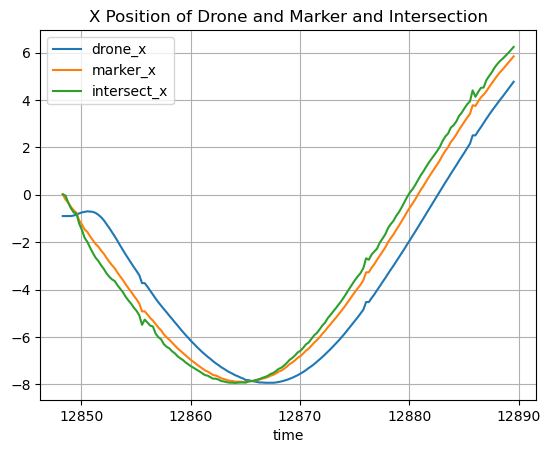

In [597]:
# plot Drone_State_1 and Marker_State_1 together over time
data[['drone_x', 'marker_x', 'intersect_x']].plot()
plt.grid()
plt.title('X Position of Drone and Marker and Intersection')

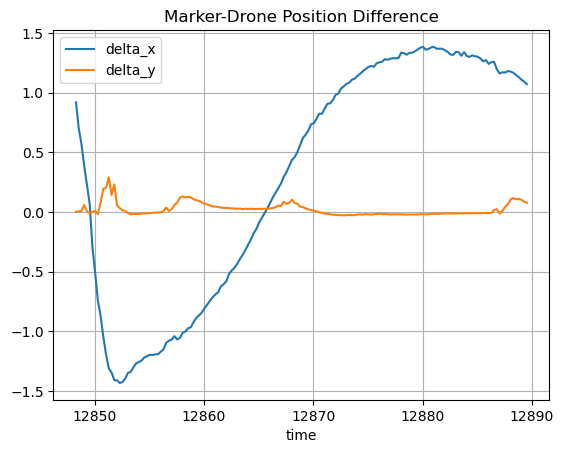

In [598]:
# plot the difference between the marker and drone positions
(data['marker_x']-data['drone_x']).plot()
(data['marker_y']-data['drone_y']).plot()
plt.legend(['delta_x', 'delta_y'])
plt.title('Marker-Drone Position Difference')
plt.grid()

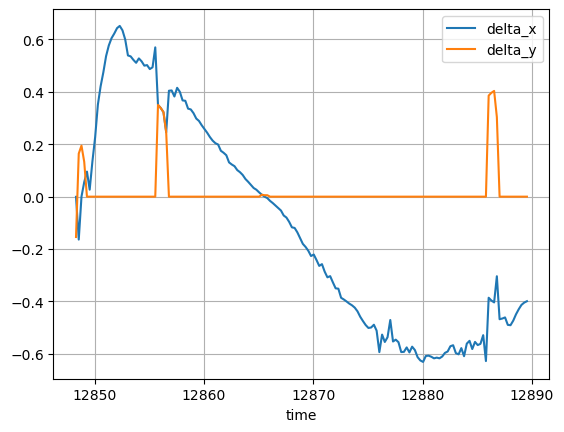

In [599]:
# plot the difference between the marker and drone positions
(data['marker_x']-data['intersect_x']).plot()
(data['marker_y']-data['intersect_y']).plot()
plt.legend(['delta_x', 'delta_y'])
plt.grid()

Text(0.5, 1.0, 'Drone and Marker Speeds')

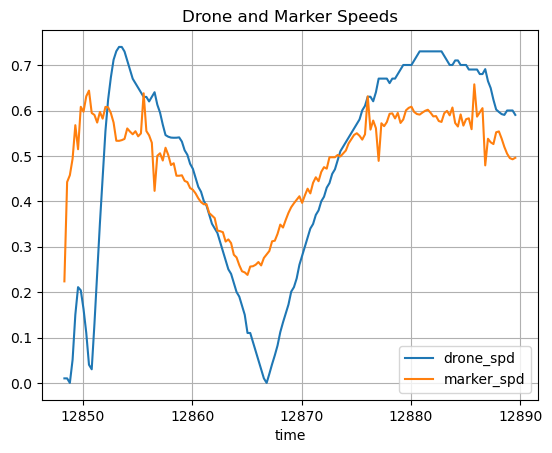

In [600]:
# plot marker velocity and drone velocity
data[['drone_spd', 'marker_spd']].plot()
plt.grid()
plt.title('Drone and Marker Speeds')

Text(0.5, 1.0, 'Drone and Marker Headings')

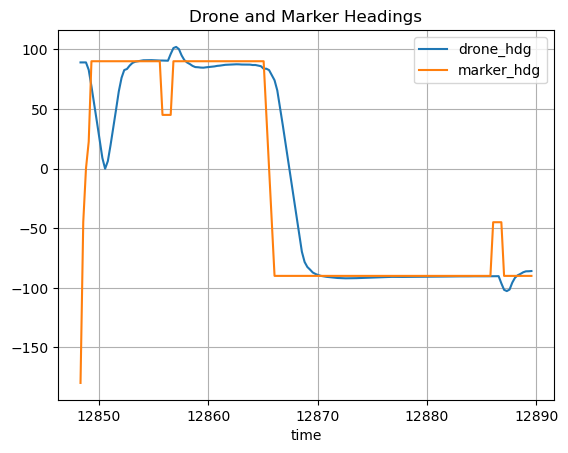

In [601]:
# plot marker heading and drone heading
data[['drone_hdg', 'marker_hdg']].plot()
plt.grid()
plt.title('Drone and Marker Headings')

/var/folders/s1/62dlm7md4bq9374rr0nn2c6c0000gn/T/ipykernel_76240/2607674147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['drone_mode_int'] = data['mode'].apply(lambda x: 0 if x == 'Scanning' else 1 if x == 'Searching' else 2)


Text(0.5, 1.0, 'Drone Mode')

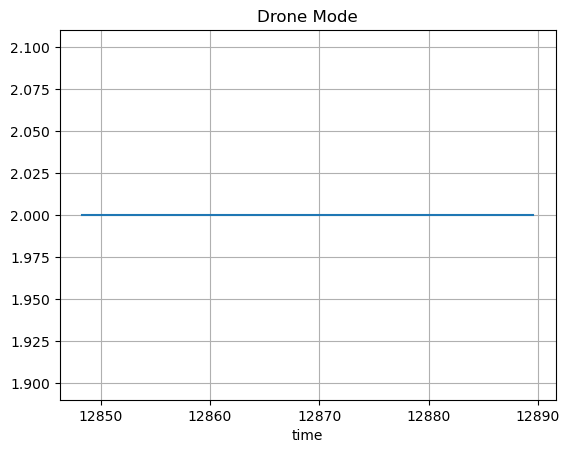

In [602]:
# plot value of 0 when drone is Scanning, and 1 when drone is Searching, and 2 when drone is Targeting
data['drone_mode_int'] = data['mode'].apply(lambda x: 0 if x == 'Scanning' else 1 if x == 'Searching' else 2)
data['drone_mode_int'].plot()
plt.grid()
plt.title('Drone Mode')

Text(0.5, 1.0, 'Drone Acceleration')

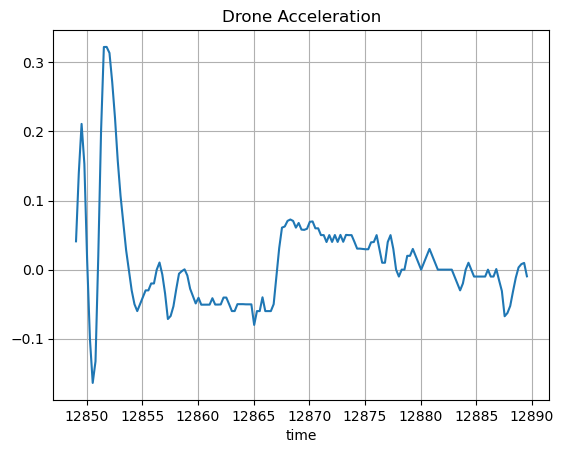

In [603]:
# plot drone acceleration
data['drone_acc'].plot()
plt.grid()
plt.title('Drone Acceleration')

Text(0.5, 1.0, 'Drone Roll and Pitch')

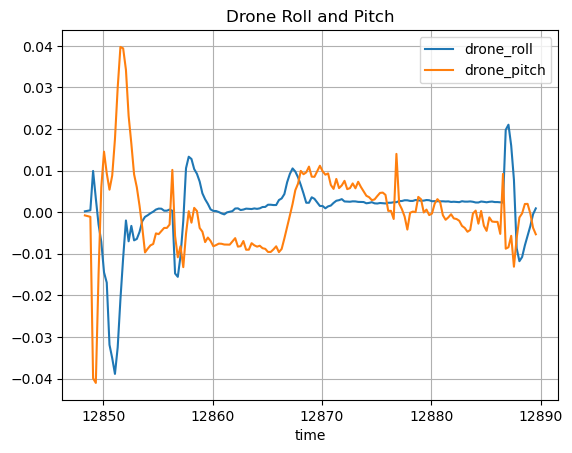

In [604]:
# plot drone roll, pitch, and yaw
data[['drone_roll', 'drone_pitch']].plot()
plt.grid()
plt.title('Drone Roll and Pitch')

Text(0.5, 1.0, 'Drone Speed')

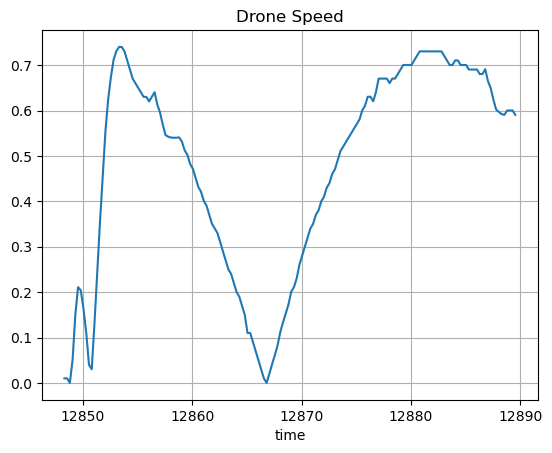

In [605]:
data['drone_spd'].plot()
plt.grid()
plt.title('Drone Speed')

/var/folders/s1/62dlm7md4bq9374rr0nn2c6c0000gn/T/ipykernel_76240/2541573487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance_to_marker'] = ((data['marker_x']-data['drone_x'])**2 + (data['marker_y']-data['drone_y'])**2)**0.5
/var/folders/s1/62dlm7md4bq9374rr0nn2c6c0000gn/T/ipykernel_76240/2541573487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance_to_intersect'] = ((data['intersect_x']-data['drone_x'])**2 + (data['intersect_y']-data['drone_y'])**2)**0.5


Text(0.5, 1.0, 'Distance to Marker and CP')

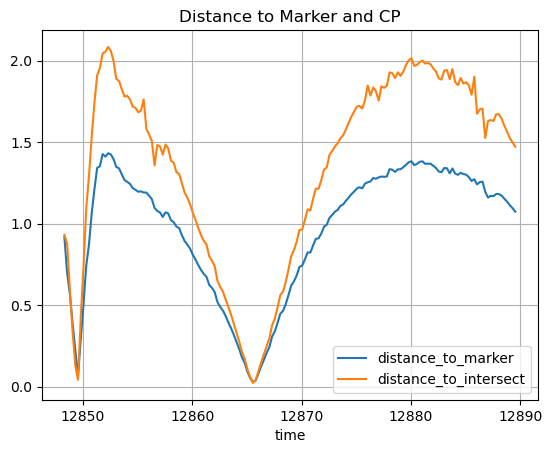

In [606]:
# plot distance to marker
data['distance_to_marker'] = ((data['marker_x']-data['drone_x'])**2 + (data['marker_y']-data['drone_y'])**2)**0.5
data['distance_to_marker'].plot()
data['distance_to_intersect'] = ((data['intersect_x']-data['drone_x'])**2 + (data['intersect_y']-data['drone_y'])**2)**0.5
data['distance_to_intersect'].plot()
plt.grid()
plt.legend(['distance_to_marker', 'distance_to_intersect'])
plt.title('Distance to Marker and CP')

In [607]:
import yaml

with open(get_latest_log_file('gzstate'), 'r') as file:
    gzstate = yaml.safe_load(file)
    
gzstate

Reading log file: gzstate_2024-01-25_21-27-43.yaml


{12850.112: {'iris_position': [0.6846659761015206,
   4.649803643546863,
   0.9863660869180745],
  'marker_4_position': [1.563007635999668, 4.57, 0.03]},
 12850.209: {'iris_position': [0.6838904370274818,
   4.651050162191157,
   0.9863390626022096],
  'marker_4_position': [1.638129896101798, 4.57, 0.03]},
 12850.289: {'iris_position': [0.6864098781997775,
   4.651862183166674,
   0.9860335914684543],
  'marker_4_position': [1.688137346585659, 4.57, 0.03]},
 12850.393: {'iris_position': [0.6931203464937331,
   4.652473716873671,
   0.985411371630377],
  'marker_4_position': [1.763032832000288, 4.57, 0.03]},
 12850.51: {'iris_position': [0.7042636652606846,
   4.652525691068041,
   0.9845835549471009],
  'marker_4_position': [1.862667851500596, 4.57, 0.03]},
 12850.602: {'iris_position': [0.7176623447223627,
   4.652296165003977,
   0.9838630336982248],
  'marker_4_position': [1.912384518312585, 4.57, 0.03]},
 12850.682: {'iris_position': [0.7320966508365834,
   4.652226571057359,
   0.

In [608]:
df_gzstate = pd.DataFrame(gzstate).T
df_gzstate

,iris_position,marker_4_position
12850.112,"[0.6846659761015206, 4.649803643546863, 0.9863...","[1.563007635999668, 4.57, 0.03]"
12850.209,"[0.6838904370274818, 4.651050162191157, 0.9863...","[1.638129896101798, 4.57, 0.03]"
12850.289,"[0.6864098781997775, 4.651862183166674, 0.9860...","[1.688137346585659, 4.57, 0.03]"
12850.393,"[0.6931203464937331, 4.652473716873671, 0.9854...","[1.763032832000288, 4.57, 0.03]"
12850.510,"[0.7042636652606846, 4.652525691068041, 0.9845...","[1.862667851500596, 4.57, 0.03]"
...,...,...
12889.421,"[-5.04768539051674, 4.643750588183498, 0.98100...","[-6.238882812499821, 4.57, 0.03]"
12889.537,"[-5.118819694950116, 4.637935178235752, 0.9808...","[-6.305165056000032, 4.57, 0.03]"
12889.628,"[-5.172807865787072, 4.633616762274814, 0.9808...","[-6.33791954993719, 4.57, 0.03]"
12889.692,"[-5.209752390934562, 4.630717656992293, 0.9807...","[-6.370413835500226, 4.57, 0.03]"


In [609]:
df_gzstate[['drone_x','drone_y','drone_z']] = df_gzstate['iris_position'].apply(pd.Series)
df_gzstate.drop(columns=['iris_position'], inplace=True)
df_gzstate[['marker_x','marker_y','marker_z']] = df_gzstate['marker_4_position'].apply(pd.Series)
df_gzstate.drop(columns=['marker_4_position'], inplace=True)

# flip sign of x and y of drone
df_gzstate['drone_x'] = -df_gzstate['drone_x']
df_gzstate['drone_y'] = -df_gzstate['drone_y']

# flip sign of x and y of marker
df_gzstate['marker_x'] = -df_gzstate['marker_x']
df_gzstate['marker_y'] = -df_gzstate['marker_y']

df_gzstate

,drone_x,drone_y,drone_z,marker_x,marker_y,marker_z
12850.112,-0.684666,-4.649804,0.986366,-1.563008,-4.57,0.03
12850.209,-0.683890,-4.651050,0.986339,-1.638130,-4.57,0.03
12850.289,-0.686410,-4.651862,0.986034,-1.688137,-4.57,0.03
12850.393,-0.693120,-4.652474,0.985411,-1.763033,-4.57,0.03
12850.510,-0.704264,-4.652526,0.984584,-1.862668,-4.57,0.03
...,...,...,...,...,...,...
12889.421,5.047685,-4.643751,0.981004,6.238883,-4.57,0.03
12889.537,5.118820,-4.637935,0.980891,6.305165,-4.57,0.03
12889.628,5.172808,-4.633617,0.980803,6.337920,-4.57,0.03
12889.692,5.209752,-4.630718,0.980729,6.370414,-4.57,0.03


Text(0.5, 1.0, 'Marker X Position between Gazebo and Aruco')

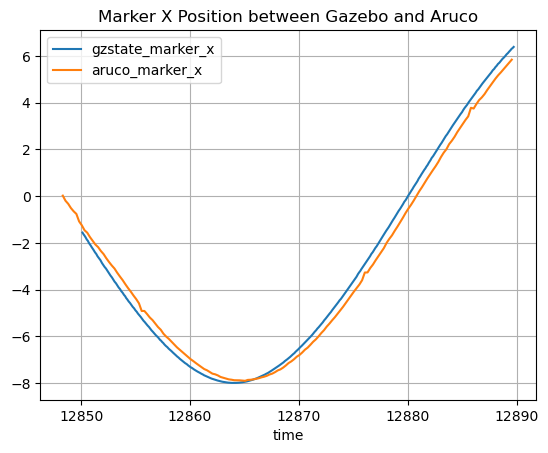

In [610]:
df_gzstate['marker_x'].plot()
data['marker_x'].plot()
plt.grid()
plt.legend(['gzstate_marker_x', 'aruco_marker_x'])
plt.title('Marker X Position between Gazebo and Aruco')

Text(0.5, 1.0, 'Marker Y Position between Gazebo and Aruco')

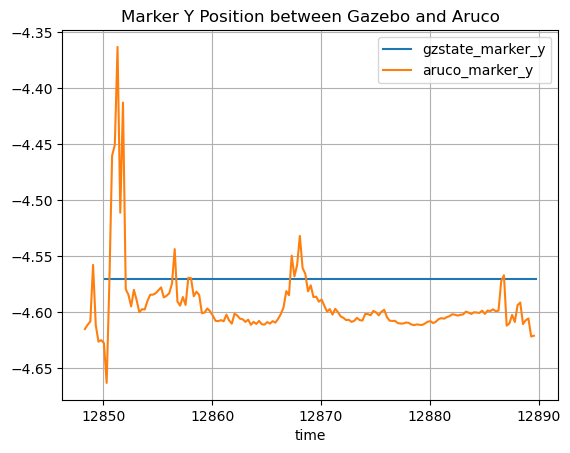

In [611]:
df_gzstate['marker_y'].plot()
data['marker_y'].plot()
plt.grid()
plt.legend(['gzstate_marker_y', 'aruco_marker_y'])
plt.title('Marker Y Position between Gazebo and Aruco')

Text(0.5, 1.0, 'Delta between Gazebo and Aruco')

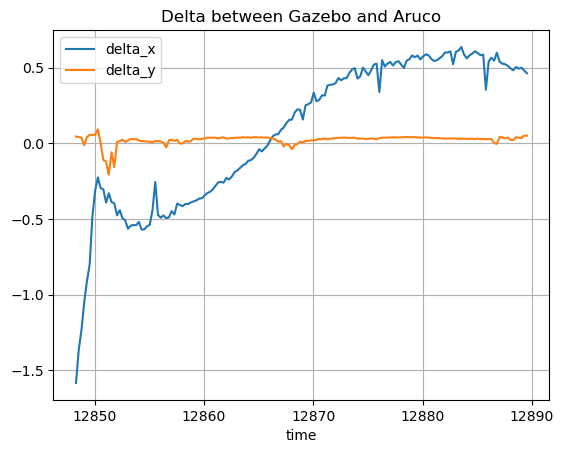

In [612]:
# culculate delta_x and delta_y between gzstate and aruco
gazebo_marker_x = df_gzstate['marker_x']
gazebo_marker_y = df_gzstate['marker_y']

# interpolate gazebo marker x for every aruco marker x
gazebo_marker_x = gazebo_marker_x.reindex(data.index, method='nearest')
gazebo_marker_y = gazebo_marker_y.reindex(data.index, method='nearest')

# delta_x between gazebo and aruco
delta_x = gazebo_marker_x - data['marker_x']
delta_y = gazebo_marker_y - data['marker_y']

# plot delta_x and delta_y
delta_x.plot()
delta_y.plot()
plt.grid()
plt.legend(['delta_x', 'delta_y'])
plt.title('Delta between Gazebo and Aruco')